In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [56]:
#loading data
data= pd.read_csv('BCICIV_2a_1.csv', delimiter=',')
data

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,1,-0.100,tongue,8,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,1,-0.096,tongue,8,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,1,-0.092,tongue,8,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,1,-0.088,tongue,8,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,1,-0.084,tongue,8,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57883,1,0.684,left,602,-22.074154,-11.489719,-9.314989,-8.518715,-6.629442,-10.866221,...,-2.208619,3.177499,5.344716,3.831044,6.110942,6.047090,10.841636,13.959124,14.028611,19.901132
57884,1,0.688,left,602,-24.568827,-12.128923,-11.760834,-9.890342,-8.587006,-11.798394,...,-4.068527,4.198450,6.219184,6.805121,6.594785,6.726245,11.667276,14.540623,14.317140,20.970911
57885,1,0.692,left,602,-25.776214,-8.892950,-10.233846,-10.316478,-10.233846,-11.785078,...,-4.934116,6.067236,6.623125,6.525469,5.436226,4.005187,12.950124,14.016830,12.670301,18.347509
57886,1,0.696,left,602,-22.473657,-6.762268,-7.077773,-9.943609,-9.323867,-14.097755,...,-6.270231,8.393230,8.558495,6.117088,3.270033,-0.260616,12.492915,13.217825,9.869342,17.060222


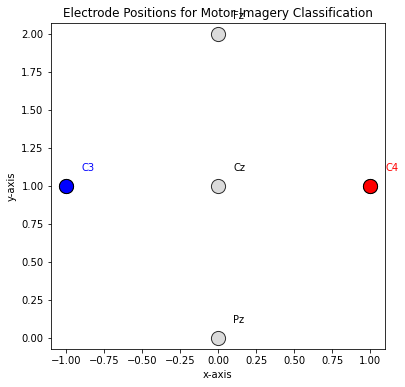

In [57]:
import matplotlib.pyplot as plt

# Step 1: Define the electrode positions (x, y coordinates)
electrode_positions = {
    'Fz': (0, 2),
    'C3': (-1, 1),
    'Cz': (0, 1),
    'C4': (1, 1),
    'Pz': (0, 0),
}

# Define the electrodes used for left and right motor imagery classification
left_motor_imagery_electrodes = ['C3']
right_motor_imagery_electrodes = ['C4']

# Step 2: Plot the scalp representation with electrodes
plt.figure(figsize=(6, 6))
plt.scatter([pos[0] for pos in electrode_positions.values()],
            [pos[1] for pos in electrode_positions.values()],
            s=200, edgecolors='k', c='lightgray', alpha=0.8)
plt.axis('equal')

# Step 3: Color-code the electrodes used for left and right motor imagery
for electrode, pos in electrode_positions.items():
    if electrode in left_motor_imagery_electrodes:
        plt.scatter(pos[0], pos[1], s=200, color='blue', edgecolors='k')
        plt.text(pos[0] + 0.1, pos[1] + 0.1, electrode, fontsize=10, color='blue')
    elif electrode in right_motor_imagery_electrodes:
        plt.scatter(pos[0], pos[1], s=200, color='red', edgecolors='k')
        plt.text(pos[0] + 0.1, pos[1] + 0.1, electrode, fontsize=10, color='red')
    else:
        plt.text(pos[0] + 0.1, pos[1] + 0.1, electrode, fontsize=10, color='black')

plt.title('Electrode Positions for Motor Imagery Classification')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Step 4: Save the image
plt.savefig('electrode_positions.png')
plt.show()


<ipython-input-58-0322ee188795>:21: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  layout.plot()


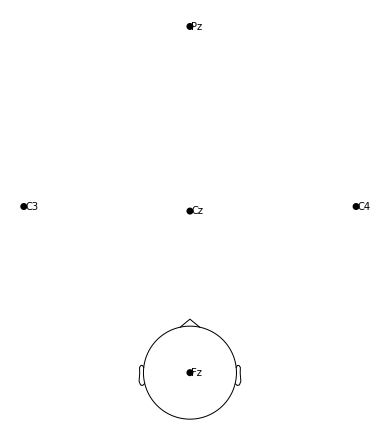

TypeError: plot() got an unexpected keyword argument 'picks'

In [58]:
import mne
import numpy as np

# Step 1: Define the electrode positions (x, y, z coordinates)
electrode_positions = {
    'Fz': [0, 0, 1],
    'C3': [-0.5, 0.5, 1],
    'Cz': [0, 0.5, 1],
    'C4': [0.5, 0.5, 1],
    'Pz': [0, 1, 1],
}

# Define the electrodes used for left and right motor imagery classification
left_motor_imagery_electrodes = ['C3']
right_motor_imagery_electrodes = ['C4']

# Step 2: Create a 3D layout with electrode positions
layout = mne.channels.make_dig_montage(ch_pos=dict(zip(electrode_positions.keys(), electrode_positions.values())))

# Step 3: Plot the scalp representation with electrodes
layout.plot()

# Step 4: Color-code the electrodes used for left and right motor imagery
for ch_name in layout.ch_names:
    color = 'gray'
    if ch_name in left_motor_imagery_electrodes:
        color = 'blue'
    elif ch_name in right_motor_imagery_electrodes:
        color = 'red'
    layout.plot(picks=[ch_name], show_names=True, color=color)



In [73]:
import pandas as pd
import mne
easycap_montage = mne.channels.make_standard_montage('easycap-M10')
print(easycap_montage)
from mne.channels import read_custom_montage
import os

# Step 1: Read the CSV dataset
data = pd.read_csv('BCICIV_2a_1.csv')

# Step 2: Create scalp plots and save as images in separate folders
for index, row in data.iterrows():
    target = row['label']
    eeg_data = row[['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7',
                    'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15',
                    'EEG-16']].values

    # Convert the EEG data to a 2D array (n_channels x n_times)
    eeg_data = eeg_data.reshape(1, -1)

    # Create a dummy info object with channel names and montage
    ch_names = ['Fz', '0', '1', '2', '3', '4', '5', 'C3', '6', 'Cz', '7', 'C4', '8', '9', '10', '11', '12', '13', '14',
                'Pz', '15', '16']
    ch_types = ['eeg'] * len(ch_names)
    sfreq = 250  # Assuming a sampling frequency of 250 Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
    montage = read_custom_montage('easycap-M10')  # You can replace this with your montage

    # Create the RawArray object
    raw_array = mne.io.RawArray(eeg_data, info, verbose='error')
    raw_array.set_montage(montage)

    # Create the scalp plot
    fig = mne.viz.plot_sensors(raw_array.info, show=False)

    # Save the scalp plot as an image in the appropriate folder
    if target == 'left':
        folder = 'left'
    elif target == 'right':
        folder = 'right'
    else:
        raise ValueError("Unknown target label")

    if not os.path.exists(folder):
        os.makedirs(folder)

    image_path = os.path.join(folder, f'sample_{index}.png')
    fig.savefig(image_path)

    # Close the figure to free up resources
    plt.close(fig)

print("Scalp plots saved as images in separate folders.")


<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 61 channels>


FileNotFoundError: File does not exist: C:\Users\21694\Path finding in neurogaming\easycap-M10

In [36]:
data=pd.DataFrame(data)

In [37]:
data.drop(data.columns[[0,1,3]], axis=1, inplace=True)
data

,label,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,EEG-C3,EEG-6,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,tongue,-1.681412,2.245496,-0.158350,1.163765,-1.523659,-0.575267,3.299057,3.928189,0.673606,...,0.758116,3.441785,0.305517,1.137473,-1.275763,-2.898359,0.656704,-2.010063,-1.613804,-1.942455
1,tongue,0.420417,0.587559,1.650510,0.970672,1.505904,0.891796,3.838386,2.514392,1.798873,...,1.541586,-0.071620,0.258909,-1.448198,0.142472,-1.968405,-1.733655,-2.935578,-3.125256,-4.674610
2,tongue,0.551365,1.499758,0.121302,2.859433,2.613414,4.636026,2.162693,1.522294,-0.072132,...,2.649097,-2.137938,-1.612096,-1.610218,-0.410173,-0.274957,-4.776535,-5.099551,-2.798995,-5.862021
3,tongue,3.054916,-1.807238,1.843603,2.286812,5.995872,6.651295,2.078354,-1.980015,0.136497,...,6.031554,-5.249621,-2.672998,-3.452370,0.189081,1.593829,-6.081577,-5.476860,-2.932163,-6.874095
4,tongue,2.506710,-2.453101,0.221178,0.127278,4.519931,6.249573,0.309444,-3.358299,-2.023038,...,7.827097,-5.309546,-2.488783,-3.707608,1.447515,4.268278,-4.383690,-4.218426,-1.331932,-5.322692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57883,left,-22.074154,-11.489719,-9.314989,-8.518715,-6.629442,-10.866221,0.232787,-4.618099,-1.263983,...,-2.208619,3.177499,5.344716,3.831044,6.110942,6.047090,10.841636,13.959124,14.028611,19.901132
57884,left,-24.568827,-12.128923,-11.760834,-9.890342,-8.587006,-11.798394,-1.627120,-2.767069,-1.268422,...,-4.068527,4.198450,6.219184,6.805121,6.594785,6.726245,11.667276,14.540623,14.317140,20.970911
57885,left,-25.776214,-8.892950,-10.233846,-10.316478,-10.233846,-11.785078,1.706509,0.420076,-0.327370,...,-4.934116,6.067236,6.623125,6.525469,5.436226,4.005187,12.950124,14.016830,12.670301,18.347509
57886,left,-22.473657,-6.762268,-7.077773,-9.943609,-9.323867,-14.097755,4.374300,2.355445,2.584561,...,-6.270231,8.393230,8.558495,6.117088,3.270033,-0.260616,12.492915,13.217825,9.869342,17.060222


In [38]:
# Convert 'label' column from categorical to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
# Get the mapping of numerical labels to original class names
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'foot': 0, 'left': 1, 'right': 2, 'tongue': 3}


In [39]:
#features separation
X= data.iloc[:, 0:].values #EEG signals
y= data['label'].values #motor imagery classes

for n in range(0,4):
    print("Record:", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Record: 1 
  Features: [3.0, -1.68141184986888, 2.245496203015734, -0.1583499508304185, 1.1637654337849652, -1.5236594460227255, -0.5752670181381107, 3.29905690013112, 3.9281885107080425, 0.6736061789772737, 0.9722089434003512, -2.3405915373688813, -2.562196104676573, 0.7581163953234283, 3.4417852655157346, 0.3055172366695805, 1.1374733664772736, -1.2757628114073412, -2.898358965253496, 0.6567041357080438, -2.0100626912150337, -1.6138036767919577, -1.9424545181381103] 
  Label: 3
Record: 2 
  Features: [3.0, 0.420416985358392, 0.5875594132430071, 1.6505101343968536, 0.9706723940122384, 1.505903764204546, 0.891796192089161, 3.838385735358393, 2.5143923459353155, 1.7988725142045467, 1.316225278627622, 0.347174797858392, -1.8275547694493008, 1.5415858555507, -0.071620274256993, 0.2589085718968538, -1.4481977982954546, 0.14247227381993, -1.968405130026223, -1.733654529064684, -2.9355776059877616, -3.125256091564685, -4.674610057910839] 
  Label: 3
Record: 3 
  Features: [3.0, 0.55136513876

In [40]:
#Split the dataset into training , validation and test sets 
X_train, X_temp, y_train, y_temp= train_test_split(X,y,test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
# Normalize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [43]:
print(X_train.shape)
print(X_test.shape)

(46310, 23)
(5789, 23)


In [44]:
# Assuming you have already loaded the data into X_train and X_test
# Reshape the data to add a third dimension (channels) for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(46310, 23, 1)
(5789, 23, 1)


In [50]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1000, validation_split=0.1)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

Epoch 1/20
42/42 [==============================] - 1s 22ms/step - loss: -69760704.0000 - accuracy: 0.2503 - val_loss: -73909360.0000 - val_accuracy: 0.2462
Epoch 2/20
42/42 [==============================] - 1s 24ms/step - loss: -70325928.0000 - accuracy: 0.2503 - val_loss: -74512024.0000 - val_accuracy: 0.2462
Epoch 3/20
42/42 [==============================] - 1s 21ms/step - loss: -70897776.0000 - accuracy: 0.2503 - val_loss: -75116720.0000 - val_accuracy: 0.2462
Epoch 4/20
42/42 [==============================] - 1s 21ms/step - loss: -71474088.0000 - accuracy: 0.2503 - val_loss: -75728264.0000 - val_accuracy: 0.2462
Epoch 5/20
42/42 [==============================] - 1s 22ms/step - loss: -72056704.0000 - accuracy: 0.2503 - val_loss: -76341592.0000 - val_accuracy: 0.2462
Epoch 6/20
42/42 [==============================] - 1s 27ms/step - loss: -72642504.0000 - accuracy: 0.2503 - val_loss: -76968568.0000 - val_accuracy: 0.2462
Epoch 7/20
42/42 [==============================] - 1s 22m

In [53]:
# Step 8: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

181/181 [==============================] - 0s 1ms/step - loss: -83115648.0000 - accuracy: 0.2467
Test Loss: -83115648.0000, Test Accuracy: 0.2467


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                41024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 41,345
Trainable params: 41,345
Non-trainable params: 0
__________________________________________________

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
folder_path = r'C:\Users\21694\Path finding in neurogaming\csv_files'
data = []
labels = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, file_name))
        data.append(df.drop(['patient', 'time', 'label'], axis=1).to_numpy())
        labels.extend(df['label'])

data = np.array(data)
labels = np.array(labels)

# Perform label encoding if needed
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)


<ipython-input-3-f4227f41c33c>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


ValueError: Found input variables with inconsistent numbers of samples: [7, 376272]

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV files and preprocess data
data_folder = r'C:\Users\21694\Path finding in neurogaming\csv_files'
features = []
labels = []

# Iterate through files in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath)
        
        # Assuming your CSV has columns 'feature_column' and 'label_column'
        # Adjust this based on your actual column names
        feature_data = df[4:].values
        label_data = df['label'].values
        
        features.append(feature_data)
        labels.append(label_data)

# Convert lists to arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Now you can proceed with building and training your CNN model using X_train and y_train
# Make sure to adjust the column names and preprocessing steps based on your actual data


<ipython-input-6-1a71f182fe3f>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)
<ipython-input-6-1a71f182fe3f>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels)


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

# Load CSV files and preprocess data
data_folder = r'C:\Users\21694\Path finding in neurogaming\csv_files'
all_features = []
all_labels = []

# Iterate through files in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        filepath = os.path.join(data_folder, filename)
        df = pd.read_csv(filepath)
        
        # Assuming your CSV has columns 'feature_column' and 'label_column'
        # Adjust this based on your actual column names
        feature_data = df[4:].values
        label_data = df['label'].values
        
        all_features.append(feature_data)
        all_labels.append(label_data)

# Find the minimum length among all feature arrays
min_length = min(len(feature_data) for feature_data in all_features)

# Trim all feature and label arrays to have the same length
features = [feature_data[:min_length] for feature_data in all_features]
labels = [label_data[:min_length] for label_data in all_labels]

# Convert lists to arrays
X = np.array(features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with building and training your CNN model using X_train and y_train
# Make sure to adjust the column names and preprocessing steps based on your actual data


In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data from CSV files
data_folder = 'C:\\Users\\21694\\Path finding in neurogaming\\csv_files'
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

features = []
labels = []

for csv_file in csv_files:
    class_name = csv_file.split('.')[0]
    data = np.loadtxt(os.path.join(data_folder, csv_file), delimiter=',')
    features.extend(data)
    labels.extend([class_name] * len(data))

# Convert the lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Preprocess and split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the feature data
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Encode labels using one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = 4
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_normalized, y_train_onehot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test_onehot)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


ValueError: could not convert string to float: 'patient'

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the folder containing CSV files
csv_folder = 'C:/Users/21694/Path finding in neurogaming/csv_files'

# Initialize lists to hold features and labels
features = []
labels = []

# Loop through each CSV file in the folder
for csv_file in os.listdir(csv_folder):
    if csv_file.endswith('.csv'):
        # Read the CSV file
        csv_path = os.path.join(csv_folder, csv_file)
        df = pd.read_csv(csv_path)
        
        # Exclude rows with 'patient' in any column
        df = df[~df.apply(lambda row: row.astype(str).str.contains('patient').any(), axis=1)]
        
        # Convert remaining rows to numpy arrays and append to features
        features.extend(df.to_numpy())
        
        # Extract the label from the CSV file name
        label = csv_file.split('.')[0]
        labels.extend([label] * len(df))

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = np_utils.to_categorical(labels_encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the folder containing CSV files
csv_folder = 'C:/Users/21694/Path finding in neurogaming/csv_files'

# Initialize lists to hold features and labels
features = []
labels = []

# Loop through each CSV file in the folder
for csv_file in os.listdir(csv_folder):
    if csv_file.endswith('.csv'):
        # Read the CSV file
        csv_path = os.path.join(csv_folder, csv_file)
        df = pd.read_csv(csv_path)
        
        # Exclude rows with 'patient' in any column
        df = df[~df.apply(lambda row: row.astype(str).str.contains('patient').any(), axis=1)]
        
        # Convert remaining rows to numpy arrays and append to features
        features.extend(df.to_numpy().astype(float))  # Ensure data is converted to float
        
        # Extract the label from the CSV file name
        label = csv_file.split('.')[0]
        labels.extend([label] * len(df))

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = np_utils.to_categorical(labels_encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the features for CNN input
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: could not convert string to float: 'left'

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the folder containing CSV files
csv_folder = 'C:/Users/21694/Path finding in neurogaming/csv_files'

# Initialize lists to hold features and labels
features = []
labels = []

# Loop through each CSV file in the folder
for csv_file in os.listdir(csv_folder):
    if csv_file.endswith('.csv'):
        # Read the CSV file
        csv_path = os.path.join(csv_folder, csv_file)
        df = pd.read_csv(csv_path)
        
        # Exclude rows with 'patient' in any column
        df = df[~df.apply(lambda row: row.astype(str).str.contains('patient').any(), axis=1)]
        
        # Convert the remaining rows to numeric values (excluding the first column)
        df = df.apply(pd.to_numeric, errors='coerce')
        df = df.dropna()  # Drop rows with NaN values
        features.extend(df.values)
        
        # Extract the label from the CSV file name
        label = csv_file.split('.')[0]
        labels.extend([label] * len(df))

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = np_utils.to_categorical(labels_encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the features for CNN input
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: zero-size array to reduction operation maximum which has no identity

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Path to the folder containing CSV files
csv_folder = 'C:/Users/21694/Path finding in neurogaming/csv_files'

# Initialize lists to hold features and labels
features = []
labels = []

# Loop through each CSV file in the folder
for csv_file in csv_files:
    class_name = csv_file.split('.')[0]
    data = np.loadtxt(os.path.join(data_folder, csv_file), delimiter=',')
    features.extend(data)
    labels.extend([class_name] * len(data))

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = np_utils.to_categorical(labels_encoded)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the features for CNN input
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


ValueError: could not convert string to float: 'patient'

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("BCICIV_2a_2.csv")

# Select relevant features (EEG channels)
features = data.iloc[:, 5:].values

# Select labels (right or left)
labels = (data["label"] == "right").astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7446882017619624


In [17]:
# Load the dataset
data = pd.read_csv('BCICIV_2a_2.csv')

# Separate features and labels
X = data.drop(['label'], axis=1)
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout  # Importing Dropout
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/50
1303/1303 - 9s - loss: 1.3619 - accuracy: 0.3135 - val_loss: 1.3179 - val_accuracy: 0.3617 - 9s/epoch - 7ms/step
Epoch 2/50
1303/1303 - 2s - loss: 1.3198 - accuracy: 0.3619 - val_loss: 1.2726 - val_accuracy: 0.4105 - 2s/epoch - 1ms/step
Epoch 3/50
1303/1303 - 2s - loss: 1.2919 - accuracy: 0.3832 - val_loss: 1.2372 - val_accuracy: 0.4323 - 2s/epoch - 1ms/step
Epoch 4/50
1303/1303 - 2s - loss: 1.2690 - accuracy: 0.3989 - val_loss: 1.2244 - val_accuracy: 0.4396 - 2s/epoch - 1ms/step
Epoch 5/50
1303/1303 - 2s - loss: 1.2470 - accuracy: 0.4140 - val_loss: 1.1858 - val_accuracy: 0.4608 - 2s/epoch - 1ms/step
Epoch 6/50
1303/1303 - 2s - loss: 1.2313 - accuracy: 0.4272 - val_loss: 1.1695 - val_accuracy: 0.4792 - 2s/epoch - 1ms/step
Epoch 7/50
1303/1303 - 2s - loss: 1.2168 - accuracy: 0.4351 - val_loss: 1.1576 - val_accuracy: 0.4891 - 2s/epoch - 1ms/step
Epoch 8/50
1303/1303 - 2s - loss: 1.1994 - accuracy: 0.4516 - val_loss: 1.1283 - val_accuracy: 0.4973 - 2s/epoch - 1ms/step
Epoch 9/

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

362/362 [==============================] - 0s 1ms/step - loss: 0.9696 - accuracy: 0.5916
Test accuracy: 0.5916


In [23]:
# Assuming `X_new` contains new data for prediction
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

NameError: name 'X_new' is not defined

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

# Load the dataset
data = pd.read_csv('BCICIV_2a_2.csv')

# Separate features and labels
X = data.drop(['label'], axis=1)
y = data['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize data to [0, 1] range
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

# Reshape to 5x5 image-like representations
image_size = 5

X_images = []
for data_point in X_scaled:
    image = data_point.reshape(image_size, image_size, 1)  # Use 1 channel for grayscale
    X_images.append(image)
X_images = np.array(X_images)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_images, y_encoded, test_size=0.2, random_state=42)

# Build the model layers (similar to previous code)
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

# Output layer
num_classes = len(label_encoder.classes_)
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (similar to previous code)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)
# Evaluate the model (similar to previous code)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Assuming 'model' is your trained CNN model
model.save('cnn_model.h5')


Epoch 1/50
1303/1303 - 7s - loss: 1.3660 - accuracy: 0.3075 - val_loss: 1.3287 - val_accuracy: 0.3477 - 7s/epoch - 5ms/step
Epoch 2/50
1303/1303 - 2s - loss: 1.3258 - accuracy: 0.3528 - val_loss: 1.2814 - val_accuracy: 0.3941 - 2s/epoch - 1ms/step
Epoch 3/50
1303/1303 - 2s - loss: 1.2946 - accuracy: 0.3757 - val_loss: 1.2520 - val_accuracy: 0.4075 - 2s/epoch - 1ms/step
Epoch 4/50
1303/1303 - 2s - loss: 1.2748 - accuracy: 0.3921 - val_loss: 1.2227 - val_accuracy: 0.4355 - 2s/epoch - 1ms/step
Epoch 5/50
1303/1303 - 2s - loss: 1.2546 - accuracy: 0.4081 - val_loss: 1.2091 - val_accuracy: 0.4433 - 2s/epoch - 1ms/step
Epoch 6/50
1303/1303 - 2s - loss: 1.2366 - accuracy: 0.4223 - val_loss: 1.1799 - val_accuracy: 0.4634 - 2s/epoch - 1ms/step
Epoch 7/50
1303/1303 - 2s - loss: 1.2217 - accuracy: 0.4321 - val_loss: 1.1621 - val_accuracy: 0.4779 - 2s/epoch - 1ms/step
Epoch 8/50
1303/1303 - 2s - loss: 1.2054 - accuracy: 0.4433 - val_loss: 1.1410 - val_accuracy: 0.4908 - 2s/epoch - 1ms/step
Epoch 9/

In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the new data
new_data = pd.read_csv('BCICIV_2a_1.csv')

# Assuming you've previously used MinMaxScaler for scaling, you should load it again
scaler = MinMaxScaler()
scaler.fit(data)  # Fit the scaler on your original dataset
new_data_scaled = scaler.transform(new_data)  # Apply the same scaling to new data

# Reshape the data to match the input shape expected by your model
new_data_reshaped = new_data_scaled.reshape(-1, 10, 10, 1)  # Adjust the shape if needed

# Load the trained model
model = load_model('cnn_model.h5')

# Make predictions on the new preprocessed data
predictions = model.predict(new_data_reshaped)

# Print the predictions or save them as needed
print(predictions)


ValueError: could not convert string to float: 'left'

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped

# Preprocess the new data
new_data_preprocessed = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make predictions on the new data
predictions = model.predict(new_data_preprocessed)

# Process the predictions
predicted_classes = []
for pred in predictions:
    # Map predictions to classes (assuming 4 classes: right, left, tongue, foot)
    class_index = np.argmax(pred)  # Get the index of the highest prediction value
    if class_index == 0:
        predicted_classes.append("right")
    elif class_index == 1:
        predicted_classes.append("left")
    elif class_index == 2:
        predicted_classes.append("tongue")
    elif class_index == 3:
        predicted_classes.append("foot")

# Display or use the predicted classes
print(predicted_classes)


ValueError: could not convert string to float: 'tongue'

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped

# Preprocess the new data
new_data_preprocessed = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make predictions on the new data
predictions = model.predict(new_data_preprocessed)

# Process the predictions
class_labels = ['right', 'left', 'tongue', 'foot']
predicted_classes = [class_labels[np.argmax(pred)] for pred in predictions]

# Display or use the predicted classes
print(predicted_classes)


ValueError: could not convert string to float: 'tongue'

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped

# Preprocess the new data
new_data_preprocessed = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make predictions on the new data
predictions = model.predict(new_data_preprocessed)

# Process the predictions
class_labels = ['right', 'left', 'tongue', 'foot']
predicted_indices = np.argmax(predictions, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_indices]

# Display or use the predicted classes
print(predicted_classes)


ValueError: could not convert string to float: 'tongue'

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the new data
new_data_preprocessed, new_labels = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make predictions on the new data
predictions = model.predict(new_data_preprocessed)

# Process the predictions
class_labels = ['right', 'left', 'tongue', 'foot']
predicted_indices = np.argmax(predictions, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_indices]

# Display or use the predicted classes
print(predicted_classes)


ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 25), found shape=(None, 10, 10, 1)


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the new data
new_data_preprocessed, new_labels = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make sure the input shape matches the model's input shape
if new_data_preprocessed.shape[1:] != model.input_shape[1:]:
    raise ValueError(f"Input shape {new_data_preprocessed.shape[1:]} doesn't match model's input shape {model.input_shape[1:]}")

# Make predictions on the new data
predictions = model.predict(new_data_preprocessed)

# Process the predictions as needed
class_labels = ['right', 'left', 'tongue', 'foot']
predicted_indices = np.argmax(predictions, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_indices]

# Display or use the predicted classes
print(predicted_classes)


ValueError: Input shape (10, 10, 1) doesn't match model's input shape (25,)

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the new data
new_data_preprocessed, new_labels = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Make sure the input shape matches the model's input shape
if new_data_preprocessed.shape[1:] != model.input_shape[1:]:
    raise ValueError(f"Input shape {new_data_preprocessed.shape[1:]} doesn't match model's input shape {model.input_shape[1:]}")

# Reshape the preprocessed data to match the expected input shape
num_samples, height, width, channels = new_data_preprocessed.shape
new_data_reshaped = new_data_preprocessed.reshape(num_samples, -1)

# Make predictions on the new data
predictions = model.predict(new_data_reshaped)

# Process the predictions as needed
class_labels = ['right', 'left', 'tongue', 'foot']
predicted_indices = np.argmax(predictions, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_indices]

# Display or use the predicted classes
print(predicted_classes)


ValueError: Input shape (10, 10, 1) doesn't match model's input shape (25,)

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CSV file
csv_file = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the new data
new_data_preprocessed, new_labels = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Get the number of classes from the original model
num_classes = model.output_shape[1]

# Create a new sequential model with adjusted input shape
adjusted_model = Sequential()

# Add a convolutional layer with appropriate input shape
adjusted_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=new_data_preprocessed.shape[1:]))

# Add remaining layers from the original model
for layer in model.layers[1:]:
    adjusted_model.add(layer)

# Compile the adjusted model
adjusted_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Make predictions on the new data
predictions = adjusted_model.predict(new_data_preprocessed)

# Process the predictions as needed
class_labels = [0, 1, 2, 3]
predicted_indices = np.argmax(predictions, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_indices]

# Display or use the predicted classes
print(predicted_classes)


TypeError: only integer scalar arrays can be converted to a scalar index

In [38]:
from keras.models import load_model

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Display the model architecture and input/output shapes
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                1664      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the original dataset
original_data = pd.read_csv('BCICIV_2a_2.csv')
original_data_preprocessed, original_labels = preprocess_data(original_data)

# Load and preprocess the additional dataset
additional_data = pd.read_csv('BCICIV_2a_1.csv')
additional_data_preprocessed, additional_labels = preprocess_data(additional_data)

# Ensure both datasets have the same number of samples
if original_data_preprocessed.shape[0] != additional_data_preprocessed.shape[0]:
    raise ValueError("Number of samples in original and additional datasets do not match.")

# Concatenate data and labels to create a unified dataset
combined_data = np.concatenate((original_data_preprocessed, additional_data_preprocessed), axis=0)
combined_labels = np.concatenate((original_labels, additional_labels), axis=0)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Get the number of classes from the combined dataset
num_classes = len(np.unique(combined_labels))

# Add a new output layer to match the number of classes in the combined dataset
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using the combined dataset
model.fit(combined_data, combined_labels, epochs=10, batch_size=32, validation_split=0.2)

# Save the fine-tuned model
model.save('fine_tuned_model.h5')


Epoch 1/10


ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 25), found shape=(None, 10, 10, 1)


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the additional CSV file
additional_csv_file = 'BCICIV_2a_1.csv'
additional_data = pd.read_csv(additional_csv_file)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the additional data
additional_data_preprocessed, additional_labels = preprocess_data(additional_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Get the number of classes from the additional data
num_classes = len(np.unique(additional_labels))

# Add a new output layer to match the number of classes in the additional data
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the additional data
model.fit(additional_data_preprocessed, additional_labels, epochs=10, batch_size=32, validation_split=0.2)

# Save the fine-tuned model
model.save('fine_tuned_model.h5')


Epoch 1/10


ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 25), found shape=(None, 10, 10, 1)


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CSV file for fine-tuning
csv_file_new_data = 'BCICIV_2a_1.csv'
new_data = pd.read_csv(csv_file_new_data)

# Assuming preprocess_data is your preprocessing function
def preprocess_data(data):
    # Extract the labels and drop them from the DataFrame
    labels = data['label']
    data = data.drop(columns=['label'])
    
    # Your preprocessing steps here
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    data_reshaped = data_scaled.reshape(-1, 10, 10, 1)  # Reshape as needed
    return data_reshaped, labels

# Preprocess the new data
new_data_preprocessed, new_labels = preprocess_data(new_data)

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fine-tune the model with new data
model.fit(new_data_preprocessed, new_labels, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed

# Save the updated model
model.save('updated_cnn_model.h5')


ValueError: Data cardinality is ambiguous:
  x sizes: 14472
  y sizes: 57888
Make sure all arrays contain the same number of samples.

In [35]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the original dataset (assuming you have it saved in 'original_data.csv')
original_data = pd.read_csv('BCICIV_2a_2.csv')

# Identify categorical columns that need to be encoded
categorical_cols = ['label']  # Replace with the actual column names

# Define column transformer to apply scaling and encoding together
# Here, we assume that all other columns in your dataset are numeric and need scaling
# Adjust this based on your dataset's structure
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ~original_data.columns.isin(categorical_cols)),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor on your original dataset
preprocessor.fit(original_data)

# Load and preprocess the new data
new_data = pd.read_csv('BCICIV_2a_1.csv')

# Apply the same preprocessing transformations to the new data
new_data_preprocessed = preprocessor.transform(new_data)

# Reshape the data if needed
new_data_reshaped = new_data_preprocessed.reshape(-1, 10, 10, 1)  # Adjust the shape if needed

# Load the trained model
model = load_model('cnn_model.h5')

# Make predictions on the new preprocessed data
predictions = model.predict(new_data_reshaped)

# Print the predictions or save them as needed
print(predictions)


ValueError: cannot reshape array of size 1678752 into shape (10,10,1)

In [39]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the original dataset (assuming you have it saved in 'original_data.csv')
original_data = pd.read_csv('BCICIV_2a_2.csv')

# Identify categorical columns that need to be encoded
categorical_cols = ['label']  # Replace with the actual column names

# Define column transformer to apply scaling and encoding together
# Here, we assume that all other columns in your dataset are numeric and need scaling
# Adjust this based on your dataset's structure
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ~original_data.columns.isin(categorical_cols)),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor on your original dataset
preprocessor.fit(original_data)

# Load and preprocess the new data
new_data = pd.read_csv('BCICIV_2a_1.csv')

new_data_preprocessed = preprocessor.transform(new_data)

# Reshape the preprocessed new data to match the expected input shape of the model
# Adjust the shape based on your model's input layer shape
new_data_reshaped = new_data_preprocessed.reshape(-1, 29)  # Adjust the shape if needed

# Make predictions on the new preprocessed and reshaped data
predictions = model.predict(new_data_reshaped)

# Print the predictions or save them as needed
print(predictions)



ValueError: in user code:

    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\21694\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 25), found shape=(32, 29)


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# Load your trained model
model = load_model('cnn_model.h5')  # Load your model here

# Assuming new_data_preprocessed has a shape of (32, 29)
new_data = pd.read_csv('BCICIV_2a_1.csv')

new_data_preprocessed = preprocessor.transform(new_data)

# Create the adjusted model with an InputLayer
adjusted_model = Sequential([
    InputLayer(input_shape=(25,)),  # Adjust the input shape to match new data (29)
])

# Add layers to the adjusted model to match the loaded model's architecture
# You might need to adjust the layer shapes and sizes to match the loaded model
adjusted_model.add(Dense(64, activation='relu', input_shape=(29,)))  # Match the first Dense layer
adjusted_model.add(Dense(32, activation='relu'))  # Match the second Dense layer
adjusted_model.add(Dense(10, activation='softmax'))  # Match the output layer

# Load the weights from the loaded model to the adjusted model
for i in range(len(adjusted_model.layers)):
    adjusted_model.layers[i].set_weights(model.layers[i].get_weights())

# Compile the adjusted model
adjusted_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now you can use adjusted_model for predictions on your new data
new_data_preprocessed = preprocess_data(new_data)  # Preprocess your new data
predictions = adjusted_model.predict(new_data_preprocessed)


NameError: name 'load_model' is not defined

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
data = pd.read_csv("BCICIV_2a_2.csv")
X = data.drop(["patient", "time", "label", "epoch"], axis=1).values
y = data["label"].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Determine the number of time steps per epoch and the number of epochs
num_epochs = len(data["epoch"].unique())
num_time_steps = X.shape[0] // num_epochs

# Reshape X to (num_epochs, num_time_steps, num_features)
X_reshaped = X_reshaped.reshape(57744, 22, 1)
X_train = X_train.reshape(46310, 22, 1)
X_test = X_test.reshape(11578, 22, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


ValueError: cannot reshape array of size 1273536 into shape (57744,22,1)

In [8]:
data = pd.read_csv("BCICIV_2a_2.csv")
print("Original data shape:", data.shape)


Original data shape: (57888, 26)


In [9]:
unique_epochs = data["epoch"].nunique()
print("Number of unique epochs:", unique_epochs)


Number of unique epochs: 288


In [10]:
print("X shape after preprocessing:", X.shape)
print("y shape after preprocessing:", y.shape)

X shape after preprocessing: (57888, 22)
y shape after preprocessing: (57888, 4)


In [11]:
print("X_reshaped shape:", X_reshaped.shape)


X_reshaped shape: (288, 201, 22)


In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46310, 22)
y_train shape: (46310, 4)
X_test shape: (11578, 22)
y_test shape: (11578, 4)


In [13]:
X_train.shape[2]

IndexError: tuple index out of range

NameError: name 'model' is not defined